[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Instance Segmentation, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Deploy the Trained Model to Roboflow

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Aug 27 16:03:49 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A4500               Off |   00000000:01:00.0  On |                  Off |
| 30%   36C    P8             27W /  200W |    2685MiB /  20470MiB |     12%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/nakahira/workspace/Nishida/fish/seavis1003


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA RTX A4500, 20047MiB)
Setup complete ✅ (20 CPUs, 62.6 GB RAM, 205.9/915.3 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [3]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

[Errno 2] No such file or directory: '{HOME}'
/home/nakahira/workspace/Nishida/fish/seavis1003
/home/nakahira/anaconda3/lib/python3.12/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jSLqWbf9yKIHEIR7GrtN")
project = rf.workspace("kota-h6pkq").project("fish-pgpgz")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [6]:
dataset.location

'/home/nakahira/workspace/Nishida/fish/seavis1003/fish-1'

## Custom Training

In [7]:
from ultralytics import YOLO
model = YOLO('yolov8s-seg.pt')
results = model.train(data="/home/nakahira/workspace/Nishida/fish/seavis1003/fish-1/data.yaml", batch=4, epochs=300, imgsz=640)

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
New https://pypi.org/project/ultralytics/8.3.3 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.12.4 tor

In [6]:
#!ls {HOME}/runs/segment/train/
!ls /home/nakahira/workspace/Nishida/fish/seavis1003/runs/segment/train

args.yaml			 MaskP_curve.png      train_batch5222.jpg
BoxF1_curve.png			 MaskPR_curve.png     val_batch0_labels.jpg
BoxP_curve.png			 MaskR_curve.png      val_batch0_pred.jpg
BoxPR_curve.png			 results.csv	      val_batch1_labels.jpg
BoxR_curve.png			 results.png	      val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch0.jpg     val_batch2_labels.jpg
confusion_matrix.png		 train_batch1.jpg     val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch2.jpg     weights
labels.jpg			 train_batch5220.jpg
MaskF1_curve.png		 train_batch5221.jpg


In [77]:
#%cd {HOME}
#Image(filename=f'{HOME}/runs/segment/train8/confusion_matrix.png', width=600)
Image(filename=f'/home/nakahira/workspace/Nishida/fish/seavis1003/runs/segment/train/results.png', width=600)

NameError: name 'Image' is not defined

In [1]:
!nvidia-smi

Tue Aug 20 18:03:29 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A4500               Off |   00000000:01:00.0  On |                  Off |
| 30%   36C    P8             20W /  200W |     471MiB /  20470MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [42]:
#fish count(Video) 
import cv2
import numpy as np

model_file = '/home/nakahira/workspace/Nishida/fish/seavis1003/runs/segment/train/weights/best.pt'
#model_file = '/home/nakahira/workspace/nakahira/real_coral_fish_train_yolov8/runs/detect/train3/weights/best.pt'

model = YOLO(model_file)

class_names = model.names

#Add Color
colors = [(255,0,0), (0,255,0),(0,0,255)]

video_path = '/home/nakahira/workspace/nakahira/seavis/OnnaDataset/GH012962.MP4'
cap = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')

#file name number change!
out = cv2.VideoWriter('/home/nakahira/workspace/Nishida/fish/seavis1003/runs/segment/predict/output_video8.mp4', fourcc, 30.0, (int(cap.get(3)),int(cap.get(4))))

frame_fish_counts = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret :
        break

    results = model(frame)
    
    class_counts = {}

    for result in results:
        for detection in result.boxes:
            class_id = int(detection.cls.item())
            x1,y1,x2,y2 = map(int, detection.xyxy[0])
            confidence = detection.conf[0]         
            label = class_names[class_id]
            
            if confidence > 0.3:
                fish_count += 1
                class_name = class_names[int(class_id)]
                
                if class_name not in class_counts:
                    class_counts[class_name] = 0
                    
                class_counts[class_name] += 1
                color = colors[int(class_id) % len(colors)]
                cv2.rectangle(frame, (int(x1), int(y1)),(int(x2), int(y2)), color, 2)
                label = f'{class_names[int(class_id)]}:{confidence:.2f}'
                cv2.putText(frame, label,(int(x1),int(y1) - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    y_offset = 30
    for class_name, count in class_counts.items():
        cv2.putText(frame, f'{class_name}:{count}', (10, y_offset), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        y_offset += 30
            
    frame_fish_counts.append(class_counts)
    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()

np.save('frame_fish_counts.npy', frame_fish_counts)

print('finish')


0: 480x640 2 rurisuzumedais, 3.7ms
Speed: 1.6ms preprocess, 3.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 rurisuzumedais, 3.5ms
Speed: 1.2ms preprocess, 3.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 rurisuzumedais, 3.5ms
Speed: 1.3ms preprocess, 3.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 rurisuzumedais, 4.1ms
Speed: 1.3ms preprocess, 4.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 rurisuzumedais, 3.5ms
Speed: 1.2ms preprocess, 3.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 rurisuzumedais, 3.5ms
Speed: 1.4ms preprocess, 3.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 rurisuzumedais, 4.1ms
Speed: 1.4ms preprocess, 4.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 rurisuzumedais, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference

finish


<Figure size 1000x500 with 0 Axes>

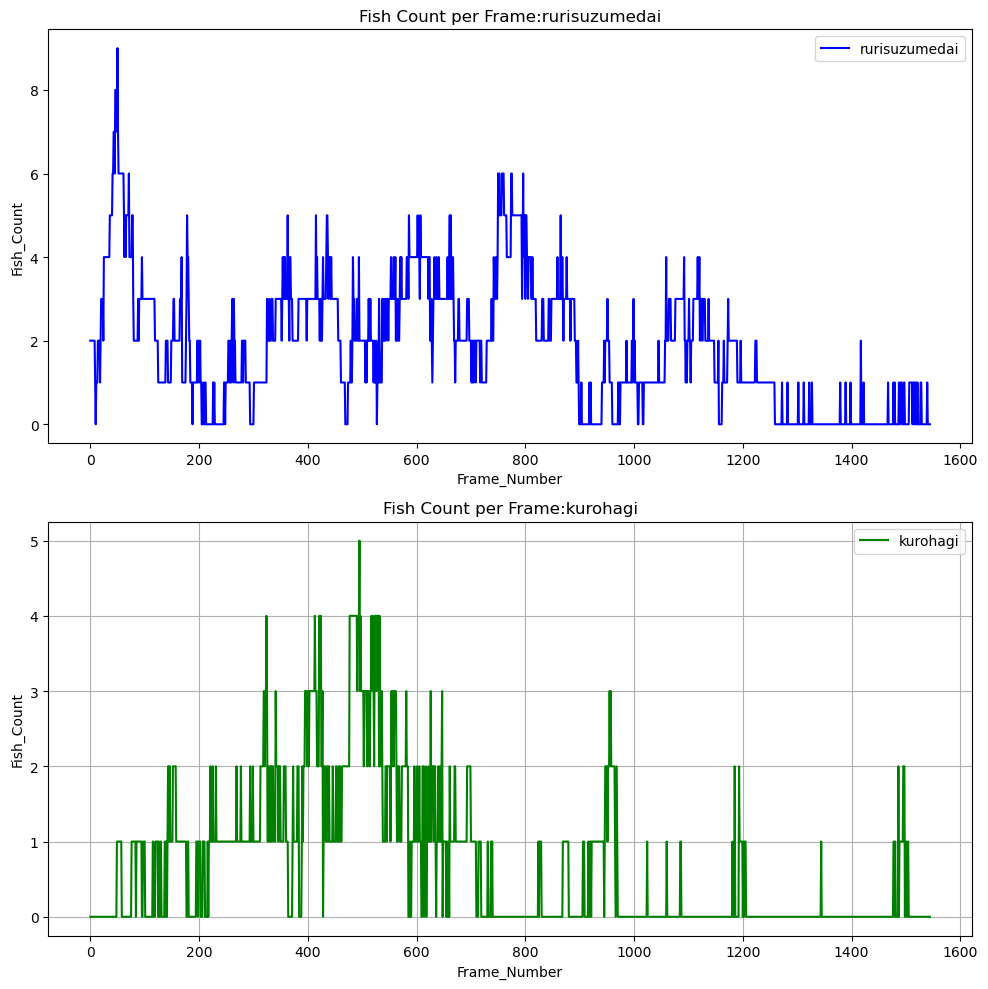

In [76]:
import numpy as np
import matplotlib.pyplot as plt

frame_counts = np.load('frame_fish_counts.npy', allow_pickle = True)

plt.figure(figsize = (10, 5))

#Add Color
colors = ['b','g','r','c','m','y','k']

all_class_names = set()
for frame in frame_counts:
    all_class_names.update(frame.keys())

num_classes = len(all_class_names)
fig, axes = plt.subplots(num_classes, 1, figsize = (10, 5 * num_classes))

for i, (class_name, color) in enumerate (zip(all_class_names, colors)):
    counts = [frame.get(class_name, 0) for frame in frame_counts]
    axes[i].plot(counts, label = class_name, color = color)
    axes[i].set_xlabel('Frame_Number')
    axes[i].set_ylabel('Fish_Count')
    axes[i].set_title(f'Fish Count per Frame:{class_name}')
    axes[i].legend()

plt.tight_layout()
plt.grid(True)

#graph_file name number change!
plt.savefig('/home/nakahira/workspace/Nishida/fish/seavis1003/runs/segment/plot_graph/output_graph1.png')

## Validate Custom Model

In [38]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data={dataset.location}/data.yaml

/home/nakahira/workspace/seavis2024/seavis0827
Ultralytics YOLOv8.0.196 🚀 Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA RTX A4500, 20047MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /home/nakahira/workspace/seavis2024/seavis0827/sanngo2-1/valid/lab
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         63        245      0.908      0.759      0.877      0.657      0.889      0.759      0.866      0.534
Speed: 2.0ms preprocess, 7.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val
